# Time Series

## Data Wrangling for Stock Market Analyst

In [1]:
import pandas as pd
import datetime
import sys
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [54]:
!ls ../05_data

hdfc_bank_stock.parquet nifty_index.parquet


## pip install pyarrow

## pip install plotly

### Task 1: Given tick data of Nifty index, plot candlestick chart for the last day in the data set.

In [56]:
df = pd.read_parquet('../05_data/nifty_index.parquet', engine='pyarrow')

In [57]:
df.columns

Index(['tick_timestamp', 'instrument_token', 'ask_orders_1', 'ask_orders_2',
       'ask_orders_3', 'ask_orders_4', 'ask_orders_5', 'ask_price_1',
       'ask_price_2', 'ask_price_3', 'ask_price_4', 'ask_price_5',
       'ask_quantity_1', 'ask_quantity_2', 'ask_quantity_3', 'ask_quantity_4',
       'ask_quantity_5', 'average_trade_price', 'bid_orders_1', 'bid_orders_2',
       'bid_orders_3', 'bid_orders_4', 'bid_orders_5', 'bid_price_1',
       'bid_price_2', 'bid_price_3', 'bid_price_4', 'bid_price_5',
       'bid_quantity_1', 'bid_quantity_2', 'bid_quantity_3', 'bid_quantity_4',
       'bid_quantity_5', 'change', 'close_price', 'high_price',
       'last_traded_price', 'last_traded_quantity', 'last_traded_time',
       'low_price', 'oi', 'oi_day_high', 'oi_day_low', 'open_price',
       'total_buy_quantity', 'total_sell_quantity', 'tradable',
       'volume_traded_today'],
      dtype='object')

In [58]:
df[['tick_timestamp', 'last_traded_price']]

,tick_timestamp,last_traded_price
0,2024-04-26 09:15:00,22615.50
1,2024-04-26 09:15:01,22612.70
2,2024-04-26 09:15:02,22611.50
3,2024-04-26 09:15:03,22611.00
4,2024-04-26 09:15:04,22596.15
...,...,...
134836,2024-05-06 15:29:56,22460.85
134837,2024-05-06 15:29:57,22463.20
134838,2024-05-06 15:29:58,22462.60
134839,2024-05-06 15:29:59,22458.00


In [ ]:
df1 = df[['tick_timestamp', 'last_traded_price']]

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134841 entries, 0 to 134840
Data columns (total 2 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   tick_timestamp     134841 non-null  datetime64[ns]
 1   last_traded_price  134841 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.1 MB


In [29]:
nifty_ts = df1.set_index('tick_timestamp')

In [30]:
nifty_ts

,last_traded_price
tick_timestamp,
2024-04-26 09:15:00,22615.50
2024-04-26 09:15:01,22612.70
2024-04-26 09:15:02,22611.50
2024-04-26 09:15:03,22611.00
2024-04-26 09:15:04,22596.15
...,...
2024-05-06 15:29:56,22460.85
2024-05-06 15:29:57,22463.20
2024-05-06 15:29:58,22462.60


In [32]:
nifty_ts.index[0]

Timestamp('2024-04-26 09:15:00')

### Create candlestick data.

In [36]:
nifty_candlesticks = nifty_ts.resample('1Min').ohlc()

In [37]:
nifty_candlesticks

last_traded_price                              
                                 open      high       low     close
tick_timestamp                                                     
2024-04-26 09:15:00          22615.50  22615.50  22582.85  22587.35
2024-04-26 09:16:00          22590.10  22606.65  22588.90  22601.85
2024-04-26 09:17:00          22600.90  22605.45  22596.35  22598.15
2024-04-26 09:18:00          22598.50  22601.40  22592.55  22597.85
2024-04-26 09:19:00          22597.65  22599.60  22584.55  22585.10
...                               ...       ...       ...       ...
2024-05-06 15:26:00          22444.10  22448.55  22442.15  22445.30
2024-05-06 15:27:00          22445.60  22455.40  22445.30  22451.40
2024-05-06 15:28:00          22453.30  22455.95  22448.30  22451.85
2024-05-06 15:29:00          22453.15  22463.20  22452.95  22458.00
2024-05-06 15:30:00          22459.65  22459.65  22459.65  22459.65

[14776 rows x 4 columns]

In [38]:
nifty_candlesticks.columns = nifty_candlesticks.columns.get_level_values(1)

In [39]:
nifty_candlesticks

,open,high,low,close
tick_timestamp,,,,
2024-04-26 09:15:00,22615.50,22615.50,22582.85,22587.35
2024-04-26 09:16:00,22590.10,22606.65,22588.90,22601.85
2024-04-26 09:17:00,22600.90,22605.45,22596.35,22598.15
2024-04-26 09:18:00,22598.50,22601.40,22592.55,22597.85
2024-04-26 09:19:00,22597.65,22599.60,22584.55,22585.10
...,...,...,...,...
2024-05-06 15:26:00,22444.10,22448.55,22442.15,22445.30
2024-05-06 15:27:00,22445.60,22455.40,22445.30,22451.40
2024-05-06 15:28:00,22453.30,22455.95,22448.30,22451.85


#### Plot candlestick chart for the last day in the available data set.

In [40]:
nifty_candlesticks_d = nifty_candlesticks.loc["2024-05-06 09:15:00":"2024-05-06 15:30:00"]

In [41]:
nifty_candlesticks_d 

,open,high,low,close
tick_timestamp,,,,
2024-05-06 09:15:00,22564.20,22564.20,22532.85,22534.20
2024-05-06 09:16:00,22532.45,22536.20,22515.90,22520.75
2024-05-06 09:17:00,22522.15,22530.95,22519.15,22530.95
2024-05-06 09:18:00,22529.40,22529.40,22514.90,22518.00
2024-05-06 09:19:00,22518.45,22523.30,22512.70,22522.80
...,...,...,...,...
2024-05-06 15:26:00,22444.10,22448.55,22442.15,22445.30
2024-05-06 15:27:00,22445.60,22455.40,22445.30,22451.40
2024-05-06 15:28:00,22453.30,22455.95,22448.30,22451.85


In [42]:
nifty_df = nifty_candlesticks_d.reset_index()

In [43]:
nifty_df

,tick_timestamp,open,high,low,close
0,2024-05-06 09:15:00,22564.20,22564.20,22532.85,22534.20
1,2024-05-06 09:16:00,22532.45,22536.20,22515.90,22520.75
2,2024-05-06 09:17:00,22522.15,22530.95,22519.15,22530.95
3,2024-05-06 09:18:00,22529.40,22529.40,22514.90,22518.00
4,2024-05-06 09:19:00,22518.45,22523.30,22512.70,22522.80
...,...,...,...,...,...
371,2024-05-06 15:26:00,22444.10,22448.55,22442.15,22445.30
372,2024-05-06 15:27:00,22445.60,22455.40,22445.30,22451.40
373,2024-05-06 15:28:00,22453.30,22455.95,22448.30,22451.85
374,2024-05-06 15:29:00,22453.15,22463.20,22452.95,22458.00


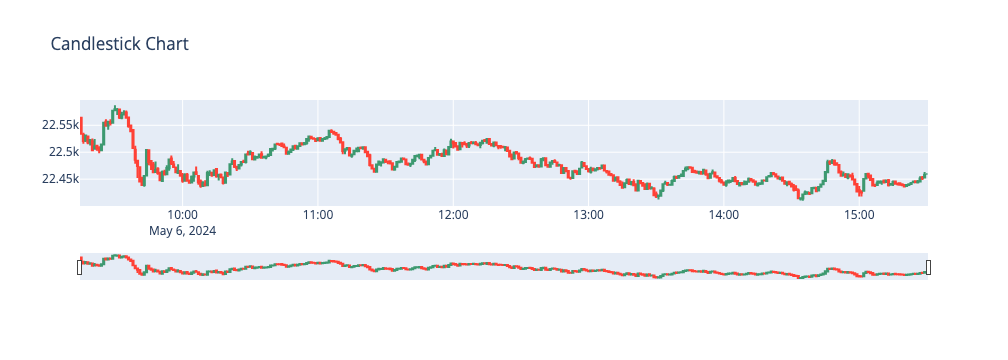

In [46]:
fig = go.Figure(data=[go.Candlestick(x=nifty_df['tick_timestamp'],
                open=nifty_df['open'],
                high=nifty_df['high'],
                low=nifty_df['low'],
                close=nifty_df['close'])])

fig.update_layout(title='Candlestick Chart')

fig.show()

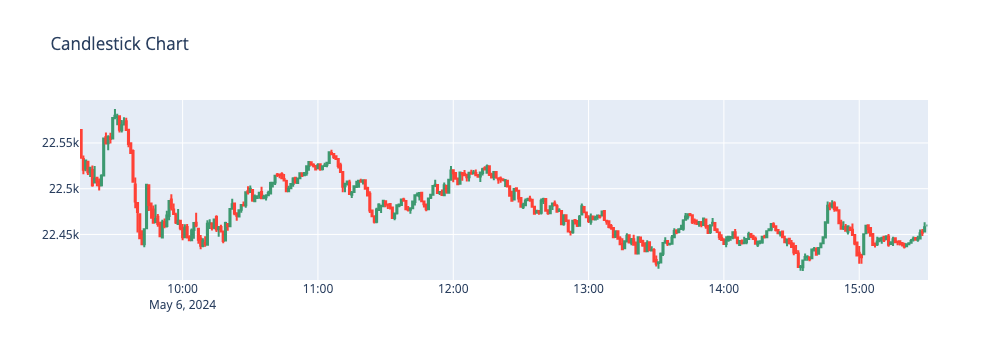

In [47]:
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

### Task 2: Plot the price of HDFC Bank stock price along with 60 days moving average.

In [59]:
!ls ../05_data

hdfc_bank_stock.parquet nifty_index.parquet


In [62]:
df = pd.read_parquet('../05_data/hdfc_bank_stock.parquet', engine='pyarrow')

In [63]:
df

,tradingsymbol,timestamp,open,high,low,close,volume,instrument_token
0,HDFCBANK,2019-12-02 00:00:00+05:30,1273.95,1273.95,1258.60,1265.75,4473102,341249
1,HDFCBANK,2019-12-03 00:00:00+05:30,1268.20,1269.00,1253.80,1255.40,3495953,341249
2,HDFCBANK,2019-12-04 00:00:00+05:30,1252.50,1256.90,1234.20,1251.65,5697807,341249
3,HDFCBANK,2019-12-05 00:00:00+05:30,1255.60,1258.75,1240.75,1245.60,6386247,341249
4,HDFCBANK,2019-12-06 00:00:00+05:30,1248.95,1260.00,1238.20,1246.05,6887325,341249
...,...,...,...,...,...,...,...,...
1238,HDFCBANK,2024-11-25 00:00:00+05:30,1785.05,1803.55,1764.90,1785.60,213868637,341249
1239,HDFCBANK,2024-11-26 00:00:00+05:30,1810.00,1810.00,1769.80,1785.55,15467783,341249
1240,HDFCBANK,2024-11-27 00:00:00+05:30,1789.90,1817.35,1785.15,1812.30,16357488,341249
1241,HDFCBANK,2024-11-28 00:00:00+05:30,1819.00,1836.10,1788.00,1793.15,17861196,341249


#### Create 60 day moving average

In [64]:
df['moving_avg'] = df['close'].rolling(window=60).mean()

#### Plot Price with Moving average

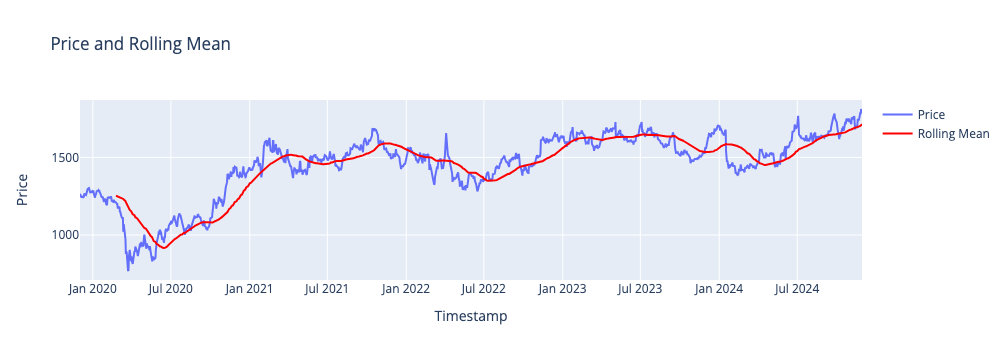

In [53]:
fig = go.Figure()

# Add the price line
fig.add_trace(go.Scatter(x=df['timestamp'], y=df['close'], mode='lines', name='Price'))

# Add the rolling mean line
fig.add_trace(go.Scatter(x=df['timestamp'], y=df['moving_avg'], mode='lines', name='Moving Avg', line=dict(color='red')))

# Update layout
fig.update_layout(title='Price and Rolling Mean', xaxis_title='Timestamp', yaxis_title='Price')

# Show the plot
fig.show()